# 虚谷物联之远程控制

## 范例说明

1.功能描述：利用虚谷号，制作一个简单的物联网作品原型，实现远程控制，并且可以和手机交互；

2.涉及材料：

    1）硬件：虚谷号
    2）软件：siot服务器，siot库（Python），xugu库（Python）
3.文档写作：谢作如、元银萍

4.参考网站：https://github.com/vvlink/SIoT

5.其他说明：本作品范例可以移植到其他平台。因为虚谷号已经默认安装了siot库，也预装了siot服务器，使用虚谷号的用户可以省略这一步。

## 代码编写

第一步：导入库

In [ ]:
import siot
import time

siot库是对mqtt库对二次封装，让代码更加简洁。

In [ ]:
from xugu import Pin

xugu库是转为虚谷号开发的通用GPIO库，通过串口控制虚谷号板载的Arduino。第一次引入这个库，虚谷号将会给板载Arduino写入标准的固件。

第二步：配置SIOT服务器

In [ ]:
SERVER = "127.0.0.1"        #MQTT服务器IP
CLIENT_ID = ""              #在SIoT上，CLIENT_ID可以留空
IOT_pubTopic  = 'xzr/002'   #“topic”为“项目名称/设备名称”
IOT_UserName ='scope'        #用户名
IOT_PassWord ='scope'     #密码

说明：虚谷号可以用127.0.0.1表示本机，用户名和密码统一使用“scope”，topicid自己定义，这里用的是“xzr/001”，表示项目名称为“xzr”，设备名称为“001”。

第三步：连接SIOT服务器

In [ ]:
siot.init(CLIENT_ID, SERVER, user=IOT_UserName, password=IOT_PassWord)
siot.connect()

第四步：初始化LED，LED的引脚使用13，即Arduino自带的led。

In [ ]:
p = Pin(13, Pin.OUT) # 初始化 A0 引脚,设置为输入模式

第五步：定义全局变量

利用第六步的回调函数，当接收到信息的时候，就给全局变量ret赋值。

In [ ]:
ret = 0

第六步：构建订阅信息的回调函数

In [ ]:
def sub_cb(client, userdata, msg):
  global ret
  print("\nTopic:" + str(msg.topic) + " Message:" + str(msg.payload))
  if msg.payload==b'1':
    ret = 1
  if msg.payload==b'0':
    ret = 0

第七步：开始订阅信息

In [ ]:
siot.subscribe(IOT_pubTopic, sub_cb)
siot.loop()

第八步：循环监视变量，并控制LED

In [ ]:
while True:
  if ret == 1:
    p.write_digital(1)
  if ret == 0:
    p.write_digital(0)

注：使用“中断服务”按钮（上方的黑色正方形），可以停止程序运行。

运行到这里，请打开siot的web管理页面，在“发送消息”页面，给主题“xzr/002”发送信息，发送“1”虚谷号的led亮起，发送“0”虚谷号的led关闭。

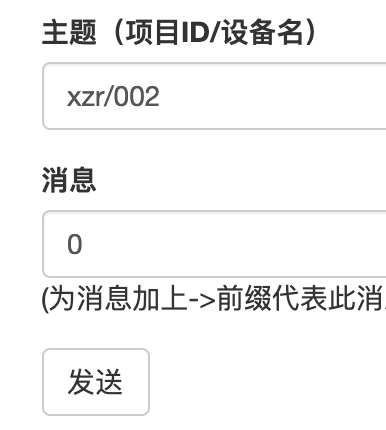

同时，jupyter页面上将看到输出的信息。回调函数sub_cb中收到消息将会打印出来。

想得知更多的控制方式，请参考虚谷物联网站（https://github.com/vvlink/SIoT）。